In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('dataset-tickets-multi-lang.csv')
data.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...,Estamos investigando urgentemente el problema ...,Incident,Technical Support,high,es,IT Services,Urgent Issue,Service Disruption,Incident Report,Service Recovery,System Maintenance,NaN,NaN,NaN,NaN
1,Anfrage zur Verfügbarkeit des Dell XPS 13 9310,"Sehr geehrter Kundenservice,\n\nich hoffe, die...","Sehr geehrter <name>,\n\nvielen Dank, dass Sie...",Request,Customer Service,low,de,Tech Online Store,Sales Inquiry,Product Support,Customer Service,Order Issue,Returns and Exchanges,NaN,NaN,NaN,NaN
2,Erro na Autocompletação de Código do IntelliJ ...,"Prezado Suporte ao Cliente <name>,\n\nEstou es...","Prezado <name>,\n\nObrigado por entrar em cont...",Incident,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Problem Resolution,Urgent Issue,IT Support,NaN,NaN,NaN,NaN
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN
4,Problème d'affichage de MacBook Air,Cher équipe de support du magasin en ligne Tec...,"Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Product Support,low,fr,Tech Online Store,Technical Support,Product Support,Hardware Failure,Service Recovery,Routine Request,NaN,NaN,NaN,NaN


In [4]:
# Selecting the data for english (en) language
en_df = data[data['language'] == 'en']
en_df.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN
5,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,NaN,NaN,NaN,NaN
7,Service outage resolution requested for ongoin...,"Dear IT Services Customer Support,\n\nI am wri...","Dear <name>,\n\nThank you for reaching out to ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue,NaN
8,Surface Pro 7 Issue,"Dear Tech Online Store Support Team,\n\nI hope...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,NaN,NaN,NaN
10,Request for software development consultation ...,"Dear Customer Support,\n\nI hope this message ...","Dear <name>,\n\nThank you for reaching out reg...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,NaN,NaN,NaN,NaN


In [6]:
# Reset the index of the en_df DataFrame
en_df = en_df.reset_index(drop=True)
en_df.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN
1,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,NaN,NaN,NaN,NaN
2,Service outage resolution requested for ongoin...,"Dear IT Services Customer Support,\n\nI am wri...","Dear <name>,\n\nThank you for reaching out to ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue,NaN
3,Surface Pro 7 Issue,"Dear Tech Online Store Support Team,\n\nI hope...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,NaN,NaN,NaN
4,Request for software development consultation ...,"Dear Customer Support,\n\nI hope this message ...","Dear <name>,\n\nThank you for reaching out reg...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,NaN,NaN,NaN,NaN


In [7]:
# creating tf-idf for 'answer' column

from sklearn.feature_extraction.text import TfidfVectorizer


def create_tfidf_for_answers(en_df):
    """
    Creates TF-IDF vectors for the 'answer' column in a DataFrame.
    """

    vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer

    # Fit and transform the 'answer' column
    tfidf_matrix = vectorizer.fit_transform(en_df['answer'].astype(str))

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame from the TF-IDF matrix
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

    return tfidf_df

# Example Usage
tfidf_answers = create_tfidf_for_answers(en_df)
tfidf_answers.head()

,000,0x80300024,10,102,11,11th,123,12345678,123456789,13,...,yet,yield,you,your,your_contact_info,youtube,zoom,zu,zögern,über
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.131350,0.226194,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.177236,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.044648,0.043935,0.0,0.0,0.369872,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.071896,0.165080,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.084359,0.103766,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.229993,0.075441,0.0,0.0,0.000000,0.0,0.0,0.0


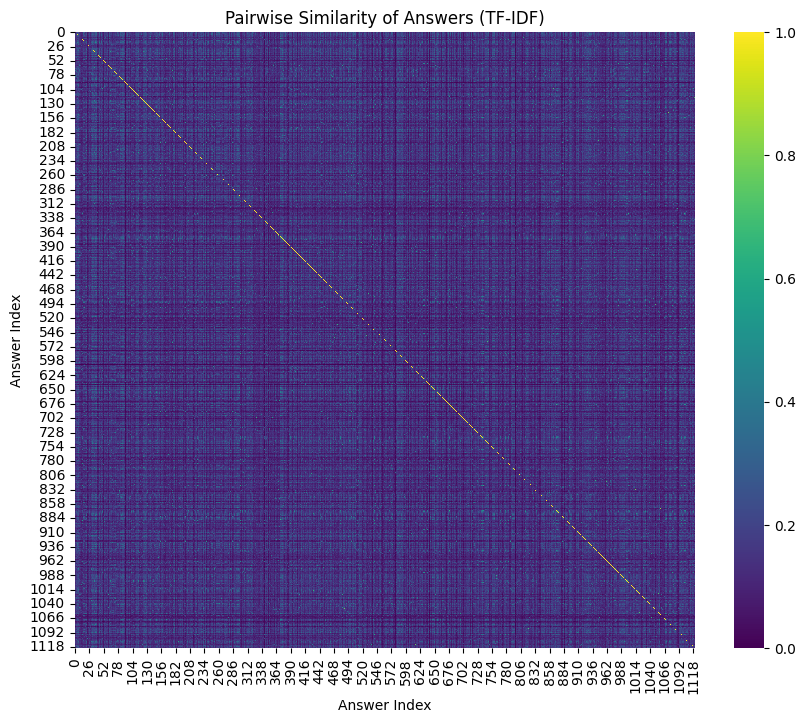

In [8]:
# calculating pairwise similarity for every row and make a heatmap of same

from sklearn.metrics.pairwise import cosine_similarity

# Calculate pairwise similarity
similarity_matrix = cosine_similarity(tfidf_answers)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=False, cmap='viridis') # annot=True to show values
plt.title('Pairwise Similarity of Answers (TF-IDF)')
plt.xlabel('Answer Index')
plt.ylabel('Answer Index')
plt.show()

In [9]:
# Applying PCA on tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Assuming 'en_df' is your DataFrame and contains the 'answer' column.
# If not loaded, load your DataFrame first. For example:
# df = pd.read_csv('your_file.csv')

def create_tfidf_for_answers(en_df):
    """
    Creates TF-IDF vectors for the 'answer' column in a DataFrame.
    """
    vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(en_df['answer'].astype(str))  # Fit and transform the 'answer' column
    feature_names = vectorizer.get_feature_names_out()  # Get the feature names (words)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)  # Create a DataFrame from the TF-IDF matrix
    return tfidf_df

# Create TF-IDF vectors
tfidf_answers = create_tfidf_for_answers(en_df)

# Apply PCA to get the top 3 principal components
pca_df = pd.DataFrame(data=PCA(n_components=3).fit_transform(tfidf_answers), columns=['PC1', 'PC2', 'PC3'])

# Print the head of the PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
0,-0.260641,-0.016383,0.174010
1,0.064125,-0.007538,-0.126927
2,-0.199264,-0.018183,0.108585
3,0.140860,0.038352,-0.169619
4,-0.179584,0.014165,0.025550


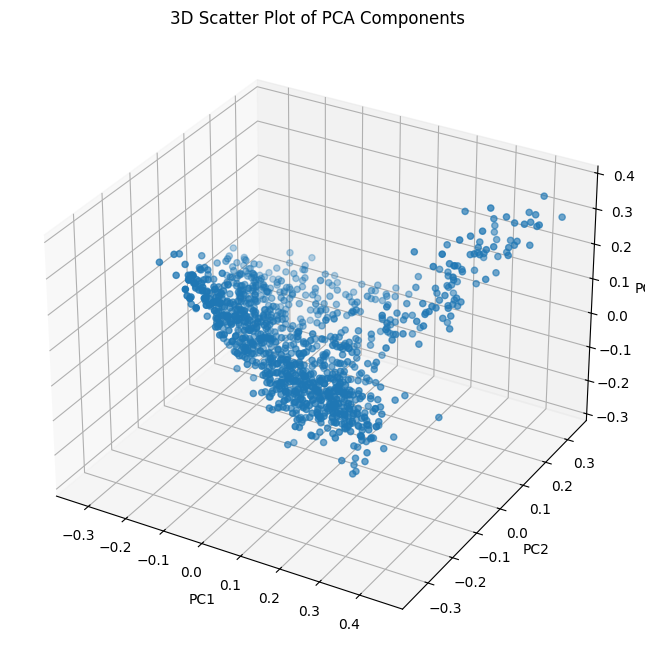

In [11]:
# Creating scatter plot for PCA components
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])  # Plot the data points
ax.set_xlabel('PC1')  # Set x-axis label
ax.set_ylabel('PC2')  # Set y-axis label
ax.set_zlabel('PC3')  # Set z-axis label
ax.set_title('3D Scatter Plot of PCA Components')  # Set plot title

plt.show()  # Display the plot

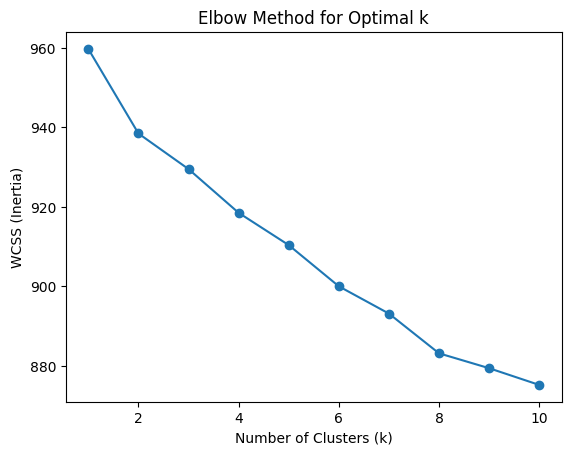

In [13]:
# Finding optimal no. of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Try different cluster numbers (1 to 10)
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=74)
    kmeans.fit(tfidf_answers)  # Fit KMeans to the data
    wcss.append(kmeans.inertia_)  # Append the inertia to the list

# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [14]:
# Applying the k-Means clustering
kmeans = KMeans(n_clusters=8, random_state=74)
kmeans.fit(tfidf_answers)

KMeans(random_state=74)

In [15]:
# Assigning the cluster labels in dataframe
en_df["answer_label"] = kmeans.labels_

In [16]:
en_df.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,answer_label
0,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN,7
1,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,NaN,NaN,NaN,NaN,4
2,Service outage resolution requested for ongoin...,"Dear IT Services Customer Support,\n\nI am wri...","Dear <name>,\n\nThank you for reaching out to ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue,NaN,0
3,Surface Pro 7 Issue,"Dear Tech Online Store Support Team,\n\nI hope...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,NaN,NaN,NaN,5
4,Request for software development consultation ...,"Dear Customer Support,\n\nI hope this message ...","Dear <name>,\n\nThank you for reaching out reg...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,NaN,NaN,NaN,NaN,0


In [17]:
en_df['answer_label'].value_counts()

,count
answer_label,
4,298
6,181
1,146
5,118
0,112
2,97
3,90
7,79


In [19]:
# Data corresponding to answer_label == 4
iss4 = en_df[en_df['answer_label'] == 4]
iss4.head(10)

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,answer_label
1,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,NaN,NaN,NaN,NaN,4
8,Assistance Needed for Chrome Crashes,"Dear Tech Online Store Customer Support, I am ...","Dear <name>,\n\nThank you for contacting Tech ...",Problem,Technical Support,low,en,Tech Online Store,Technical Support,Software Bug,Problem Resolution,Customer Service,NaN,NaN,NaN,NaN,NaN,4
9,NaN,"Dear Customer Care,\n\nI am encountering chall...","Dear <name>,\n\nWe appreciate you getting in t...",Problem,Technical Support,medium,en,IT Services,Technical Support,Product Support,Software Bug,Problem Resolution,Account Assistance,NaN,NaN,NaN,NaN,4
10,Google Chrome Extension Issue,"Dear Customer Support, I am experiencing a com...","Dear <name>,\n\nThank you for reaching out. We...",Request,Product Support,medium,en,Tech Online Store,Technical Support,Software Bug,Problem Resolution,Technical Guidance,Customer Service,NaN,NaN,NaN,NaN,4
14,Challenge with Instance Launch,Concern with service implementation.,"Hello, could you provide further details about...",Problem,Customer Service,medium,en,IT Services,Technical Support,Service Disruption,Problem Resolution,Product Support,NaN,NaN,NaN,NaN,NaN,4
20,Recurring Crash in Visual Studio Code 1.70 Issue,"Dear Customer Support,\n\nI am writing to brin...","Dear <name>,\n\nThank you for reaching out and...",Incident,Product Support,medium,en,Software Development Company,Software Bug,Technical Support,Problem Resolution,Urgent Issue,Performance Tuning,NaN,NaN,NaN,NaN,4
23,Issue with Wireless Printing Setup,"Dear Customer Support,\n\nI am experiencing an...","Dear <name>, please check if the color ink car...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Service Recovery,NaN,NaN,NaN,NaN,4
24,Inquiry on MacBook Air M1 Details,"Dear Customer Support Team,\n\nI hope this mes...","Dear <name>,\n\nThank you for reaching out. To...",Request,Customer Service,low,en,Tech Online Store,Product Support,Technical Guidance,General Inquiry,Hardware Failure,Software Bug,Problem Resolution,NaN,NaN,NaN,4
27,NaN,"Dear Tech Online Store Support Team, \n\nI am ...","Dear <name>,\n\nThank you for reaching out to ...",Request,Product Support,low,en,Tech Online Store,Technical Support,Software Bug,Problem Resolution,Technical Guidance,Product Support,NaN,NaN,NaN,NaN,4
28,NaN,"Hello,\n\nCould you please check availability ...","Hello <name>,\n\nThank you for your inquiry. Y...",Request,Customer Service,low,en,Tech Online Store,Sales Inquiry,Customer Service,General Inquiry,Product Support,NaN,NaN,NaN,NaN,NaN,4


In [20]:
# answers correponding to answer_label == 4
en_df[en_df['answer_label'] == 4]['answer'].head(10)

,answer
1,"Dear <name>,\n\nThank you for reaching out. We..."
8,"Dear <name>,\n\nThank you for contacting Tech ..."
9,"Dear <name>,\n\nWe appreciate you getting in t..."
10,"Dear <name>,\n\nThank you for reaching out. We..."
14,"Hello, could you provide further details about..."
20,"Dear <name>,\n\nThank you for reaching out and..."
23,"Dear <name>, please check if the color ink car..."
24,"Dear <name>,\n\nThank you for reaching out. To..."
27,"Dear <name>,\n\nThank you for reaching out to ..."
28,"Hello <name>,\n\nThank you for your inquiry. Y..."


In [21]:
en_df.loc[
    en_df["type"].eq("Incident") & \
    en_df["queue"].eq("Technical Support") & \
    en_df["priority"].eq("high") & \
    en_df["language"].eq("en") & \
    en_df["business_type"].eq("IT Services") & \
    en_df["tag_1"].eq("Urgent Issue") & \
    en_df["answer_label"].eq(4), "answer"].values

array(["Dear <name>,\n\nThank you for reaching out. We're sorry to hear about the issue with your React app. To provide immediate assistance, please check the browser's console for any error messages and ensure all dependencies are up-to-date. Our technical team has been alerted and will contact you shortly at <tel_num>.\n\nBest regards,\nCustomer Support Team",
       'Betreff: Re: Dringendes AWS Anliegen\n\nHallo <name>,\n\nVielen Dank für Ihre Nachricht. Wir verstehen die Dringlichkeit des Problems, das Sie mit Ihrem AWS Management Service haben und das die Verfügbarkeit beeinflusst. Unser technisches Team wird sich umgehend mit dieser Angelegenheit befassen, um die reguläre Bereitstellung wiederherzustellen. Wir halten Sie schnellstmöglich über den Fortschritt auf dem Laufenden. Bitte zögern Sie nicht, uns jederzeit zu kontaktieren, falls wir Ihnen anderweitig behilflich sein können.\n\nMit freundlichen Grüßen,\nDas Service Desk Team',
       'Dear <name>,\n\nWe appreciate you reac

In [25]:
print(en_df['type'].value_counts())
print()
print(en_df['queue'].value_counts())
print()
print(en_df['priority'].value_counts())
print()
print(en_df['business_type'].value_counts())
print()
print(en_df['tag_1'].value_counts())

type
Incident    474
Request     301
Problem     217
Change      129
Name: count, dtype: int64

queue
Technical Support                  370
Product Support                    194
Customer Service                   176
IT Support                         131
Billing and Payments               102
Returns and Exchanges               53
Service Outages and Maintenance     38
Sales and Pre-Sales                 32
General Inquiry                     14
Human Resources                     11
Name: count, dtype: int64

priority
high      482
medium    447
low       192
Name: count, dtype: int64

business_type
IT Services                     488
Tech Online Store               372
IT Consulting Firm              109
Software Development Company     90
Online Store                     59
IT Consulting Service             2
Adobe Photoshop 2024              1
Name: count, dtype: int64

tag_1
Technical Support        617
Billing Issue             97
IT Support                90
Urgent Issue     

In [28]:
# answers corresponding to type == 'Incident' and queue == 'Technical Support'
en_df[en_df['answer_label'].eq(4) & en_df['type'].eq('Incident') & en_df['queue'].eq('Technical Support', 'answer')].values
en_df[en_df['answer_label'].eq(4) & en_df['type'].eq('Incident') & en_df['queue'].eq('Technical Support')]['answer'].value_counts()

,count
answer,
"Dear <name>,\n\nThank you for reaching out. We understand the urgency of the screen sharing issue with Zoom version 5.11.0 during your webinars. We recommend updating to the latest Zoom version, as many issues can be resolved with updates. If the problem persists after updating, please contact our technical team directly at <tel_num> for immediate assistance.\n\nBest regards,\nCustomer Support Team",1
We appreciate your communication. We will promptly tackle the battery concern regarding the MacBook Air M1.,1
"Betreff: Re: Dringendes AWS Anliegen\n\nHallo <name>,\n\nVielen Dank für Ihre Nachricht. Wir verstehen die Dringlichkeit des Problems, das Sie mit Ihrem AWS Management Service haben und das die Verfügbarkeit beeinflusst. Unser technisches Team wird sich umgehend mit dieser Angelegenheit befassen, um die reguläre Bereitstellung wiederherzustellen. Wir halten Sie schnellstmöglich über den Fortschritt auf dem Laufenden. Bitte zögern Sie nicht, uns jederzeit zu kontaktieren, falls wir Ihnen anderweitig behilflich sein können.\n\nMit freundlichen Grüßen,\nDas Service Desk Team",1
"Dear <name>,\n\nWe appreciate you reaching out to us regarding the concern with Zoom 5.11.0. We understand the urgency and apologize for any difficulties this has caused. To assist you, we recommend checking if there are any updates or patches released after version 5.11.0 that might resolve this issue. Additionally, please ensure that your operating system and drivers are up to date, as these factors can sometimes lead to compatibility issues.\n\nIf the issue continues, kindly share any error codes or messages that appear when the application crashes; this information will assist our technical team in diagnosing the problem more effectively. In the meantime, you might consider using Zoom through a web browser as a temporary workaround.\n\nOur team prioritizes such requests and will strive to rectify this issue swiftly. Do not hesitate to contact us if you require any further assistance. We value your patience and collaboration.\n\nBest regards,\n\nCustomer Support Team",1
"Hello <name>,\n\nWe appreciate you reaching out to us. We suggest that you uninstall any prior antivirus programs and verify that your computer meets the necessary specifications. Additionally, you can obtain the most recent installer from our website.\n\nBest wishes,\nCustomer Support",1
"Dear <name>,\n\nThank you for reaching out regarding your TP-Link EAP245 connectivity issue. To help resolve potential wireless interference, try changing the channel settings on both frequency bands within your access point's management interface. Additionally, ensure the firmware is up to date as updates can enhance performance. If the issue persists, resetting the device to factory settings may also help. For further assistance, refer to the EAP245 support documentation or contact our technical support team directly.\n\nBest regards,\nTech Online Store Customer Support",1
"Dear <name>,\n\nThank you for reaching out and informing us about the issue with the code completion feature in IntelliJ IDEA 2024.1. We understand how crucial this tool is for your development work.\n\nTo assist you better, please try the following steps:\n1. Check your system’s compatibility with IntelliJ IDEA 2024.1.\n2. Clear the IDE's cache by going to File > Invalidate Caches / Restart.\n3. Disable any unnecessary plugins to see if they are causing conflicts.\n4. Increase memory allocation for the application via VM options.\n\nIf the problem persists, please send us the logs (located at Help > Collect Logs) for further analysis. We are committed to resolving this issue as soon as possible.\n\nBest Regards,\nCustomer Support Team",1
"Dear <name>,\n\nThank you for reaching out regarding the connectivity issues with Zoom 5.11.0. We understand how important seamless communication is for your work.\n\nFirstly, please ensure that you have the latest Zoom version, as updates often fix existing bugs. Additio

In [29]:
# Creating template for type == 'Incident' and queue == 'Technical Support'
template = {
    ('Incident', 'Technical Support'): f"""

      Dear {{customer_name}},

      Thank you for reaching out to us regarding the issue with {{product}}. We understand the importance of resolving this promptly.

      To address this issue, please follow these steps:

      1. {{step_1}}
      2. {{step_2}}
      3. {{step_3}}

      If these steps do not resolve the issue, kindly provide us with more details.

      We appreciate your patience and are committed to resolving this issue as quickly as possible.

      Best regards,
      {{"Customer Support Team"}}
      """
}

In [30]:
def generate_response(template_dict, key, **kwargs):
    """
    Generates a response based on the provided template dictionary and key.

    Args:
        template_dict (dict): Dictionary containing templates as f-strings.
        key (tuple): Key to select the appropriate template.
        kwargs (dict): Dynamic values to populate the template.

    Returns:
        str: The populated template as a string.
    """
    if key not in template_dict:
        raise KeyError(f"The key {key} is not in the template dictionary.")

    template = template_dict[key]

    try:
        # Use the provided kwargs to format the f-string
        return eval(f"f'''{template}'''", {}, kwargs)
    except KeyError as e:
        raise ValueError(f"Missing key for template substitution: {e}")

In [35]:
# Dynamic values
key = ('Incident', 'Technical Support')
variables = {
    "customer_name": "Alice",
    "product": "AWS Management Service",
    "step_1": "Restart your system.",
    "step_2": "Ensure all services are up-to-date.",
    "step_3": "Check system logs for errors."
}


In [36]:
response = generate_response(template, key, **variables)
print(response)



      Dear Alice,

      Thank you for reaching out to us regarding the issue with AWS Management Service. We understand the importance of resolving this promptly.

      To address this issue, please follow these steps:

      1. Restart your system.
      2. Ensure all services are up-to-date.
      3. Check system logs for errors.

      If these steps do not resolve the issue, kindly provide us with more details.

      We appreciate your patience and are committed to resolving this issue as quickly as possible.

      Best regards,
      Customer Support Team
      
